In [ ]:
# !kaggle datasets download asinow/car-price-dataset

Dataset URL: https://www.kaggle.com/datasets/asinow/car-price-dataset
License(s): other
100%|█████████████████████████████████████████| 135k/135k [00:00<00:00, 561kB/s]
100%|█████████████████████████████████████████| 135k/135k [00:00<00:00, 560kB/s]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [4]:
df = pd.read_csv("/Users/zeeshan.sardar/my_venum_ml/demos/examples/car_price_dataset.csv")

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (10000, 10)


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [5]:
print(df.info())  # Check for missing values and data types
print(df.describe())  # Summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB
None
               Year   Engine_Size        Mileage         Doors   Owner_Count  \
count  10000.000000  10000.000000   10000.000000  10000.000000  10000.000000   
mean    2011.543700      3.000560  149239.111800      3.497100      2.991100   
std        6.897699      1.149324   86322.348957      1.110097     

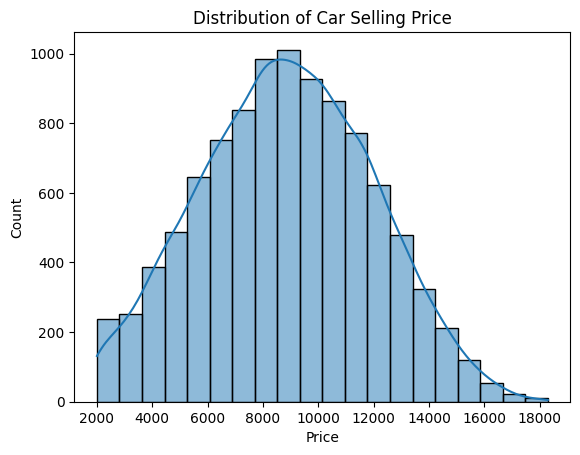

In [6]:
# Visualizing Target Variable
sns.histplot(df['Price'], bins=20, kde=True)
plt.title("Distribution of Car Selling Price")
plt.show()

In [26]:
# Select categorical columns
cat_features = df.select_dtypes(include=['object']).columns
# Apply one hot encoding on categorical columns
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_data = encoder.fit_transform(df[cat_features])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_features))
encoded_df.head()

/Users/zeeshan.sardar/miniconda3/envs/venum_ml/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Kia,Brand_Mercedes,Brand_Toyota,Brand_Volkswagen,Model_5 Series,...,Model_Sonata,Model_Sportage,Model_Tiguan,Model_Tucson,Model_X5,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Transmission_Semi-Automatic
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [27]:
# Merge the eoncoded df into the original after droping the original categorical columns
df_new = pd.concat([df.drop(list(cat_features), axis=1, inplace=False), encoded_df], axis=1)
df_new.head()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,...,Model_Sonata,Model_Sportage,Model_Tiguan,Model_Tucson,Model_X5,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Transmission_Semi-Automatic
0,2020,4.2,289944,3,5,8501,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2012,2.0,5356,2,3,12092,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2020,4.2,231440,4,2,11171,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,2.0,160971,2,1,11780,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2003,2.6,286618,3,3,2867,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [29]:
# Get X and y for training/testing
X = df_new.drop('Price', axis=1, inplace=False)
y = df_new.Price
print(f"Sizes X = {X.shape}, y = {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=42)
print(f"Sizes X_train = {X_train.shape}, X_test = {X_test.shape}")

Sizes X = (10000, 48), y = (10000,)
Sizes X_train = (8000, 48), X_test = (2000, 48)


In [30]:
# fit and evaluate the model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 20.003565673020262
Mean Squared Error: 4213.922497871217
R^2 Score: 0.9995413573365176


#### Train and evaluate the sklearn Linear Regression on fewer features

In [65]:
selected_features = ['Engine_Size', 'Mileage', 'Year', 'Owner_Count']
X_df = df_new[selected_features]

X_max = X_df.max()
X_min = X_df.min()
X_mean = X_df.mean()
epsilon = 1e-100
scaling_factors = 1 / np.maximum(X_max - X_min, epsilon)
scaling_factors

Engine_Size    0.250000
Mileage        0.000003
Year           0.043478
Owner_Count    0.250000
dtype: float64

In [ ]:
# Using the above computed scaling_factors cause the model coefficients to explode reching upto 10^34 in the ecnrypted domain. 
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X_df)
# scaled_df = X_df * scaling_factors
scaled_df

array([[ 1.04365690e+00,  1.63007524e+00,  1.22602090e+00,
         1.41212224e+00],
       [-8.70607405e-01, -1.66689517e+00,  6.61558054e-02,
         6.25610429e-03],
       [ 1.04365690e+00,  9.52302614e-01,  1.22602090e+00,
        -6.96676963e-01],
       ...,
       [-4.87267277e-04, -7.24936723e-01, -2.23810469e-01,
        -1.39961003e+00],
       [-1.39267949e+00,  8.86638467e-01, -1.38367556e+00,
        -1.39961003e+00],
       [-7.83595391e-01,  1.00128420e-01, -1.52865870e+00,
         6.25610429e-03]])

In [67]:

y = df_new['Price'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=42, shuffle=True)

print(f"Sizes X_train = {X_train.shape}, X_test = {X_test.shape}")

model = LinearRegression()
model.fit(X_train, y_train)

print(f"Intercept: {model.intercept_} \n Coeff.: {model.coef_}")


Sizes X_train = (8000, 4), X_test = (2000, 4)
Intercept: 8844.165673771571 
 Coeff.: [ 1152.21837344 -1731.71797551  2061.33315529     9.13781812]


In [68]:
y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 888.8822613593333
Mean Squared Error: 1137488.1830359127
R^2 Score: 0.8761959646360732


#### Train and evaluate our Encrypted Linear Regression on fewer features

In [69]:
from venumML.linear_models.regression.linear_regression import EncryptedLinearRegression
from venumML.venum_tools import encrypt_array, decrypt_array
from venumML.venumpy import small_glwe as vp 

In [70]:
ctx = vp.SecretContext()
ctx.precision = 6

In [72]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=42, shuffle=True)

model_enc = EncryptedLinearRegression(ctx)

X_train_enc, y_train_enc = encrypt_array(X_train, ctx), encrypt_array(y_train, ctx)
model_enc.encrypted_fit(ctx, X_train_enc, y_train_enc, lr=0.03)

In [74]:
decrypt_array(model_enc._encrypted_coef_) 

array([ 1018.63125177, -1528.94324463,  1818.01658786,     8.29677686])

In [76]:
# Evaluating the results of the cipher text model. The results are similar. 
y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 888.8822613593333
Mean Squared Error: 1137488.1830359127
R^2 Score: 0.8761959646360732


Testing with pandas apply - Not for demonstration

In [ ]:

df_enc = df_new.applymap(lambda x : ctx.encrypt(x))

/tmp/ipykernel_2119/3430222323.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_enc = df_new.applymap(lambda x : ctx.encrypt(x))


In [148]:
scaled_df_enc = scaled_df.applymap(lambda x: ctx.encrypt(x))
y_enc = y.apply(lambda x: ctx.encrypt(x))

X_train, X_test, y_train, y_test = train_test_split(scaled_df_enc, y_enc, test_size=0.2, random_state=42, shuffle=True)

print(f"Sizes X_train = {X_train.shape}, X_test = {X_test.shape}")


/tmp/ipykernel_2119/3230982128.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  scaled_df_enc = scaled_df.applymap(lambda x: ctx.encrypt(x))


Sizes X_train = (8000, 4), X_test = (2000, 4)


In [152]:
scaled_df_enc.applymap(lambda x: ctx.decrypt(x)).head()

/tmp/ipykernel_2119/2481227362.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  scaled_df_enc.applymap(lambda x: ctx.decrypt(x)).head()


,Engine_Size,Mileage,Year,Owner_Count
0,1.05,0.966731,87.826087,1.25
1,0.50,0.017858,87.478261,0.75
2,1.05,0.771667,87.826087,0.50
3,0.50,0.536710,87.956522,0.25
4,0.65,0.955642,87.086957,0.75


In [154]:
f1 = ctx.encrypt(1.05)
f2 = ctx.encrypt(0.5)
f3 = ctx.encrypt(0.65)

ctx.decrypt(f1*f2+f3)


1.175

In [95]:
scaling_factor_enc = scaling_factor.apply(lambda x: ctx.encrypt(x))
X_df_enc = X_df.applymap(lambda x : ctx.encrypt(x))


/tmp/ipykernel_2119/112152676.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_df_enc = X_df.applymap(lambda x : ctx.encrypt(x))


In [ ]:
X_df_enc_scaled = X_df_enc.applymap(lambda x: x*scaling_factor_enc)

X_df_enc.head()

In [ ]:
print(f"Plaint text scaled sample: \n{scaled_df.iloc[0]}, \n Encrypted scaled sample: \n{X_df_enc_scaled.iloc[0]}")
